# Prospecção de Dados (Data Mining) DI/FCUL - Project

## Project (MC/DI/FCUL - 2024)

### GROUP:`09`

* Afonso Gama, 55857 - x Hours
* Eduardo Carneiro, 62515 - 2 Hours
* Guilherme Rosario, 62543 - x Hours
* Marco Viana, 62550 - x Hours

# TODO list:
- Compare which molecules are similar based on the fingerprints
    - Get metric for similarity and understand how the the similar ones can be used to aid the prediction


- Split the activity training dataset into training and validation
    - Create a function to train the model iteratively and validate it at certain intervals, plot the results in the end of the training


- Test more models


In [1]:
import pickle

In [4]:
# Load the fingerprints dataset
with open('../data/mol_bits.pkl', 'rb') as f:
    data = pickle.load(f)

In [ ]:
print(type(data))
print(data)

---

In [4]:
# Load the data from the csvs
import pandas as pd
import numpy as np
import random

random.seed(42)

df_train_original = pd.read_csv("../data/activity_train.csv", header=None)
df_test = pd.read_csv("../data/activity_test_blanked.csv", header=None)

# Split train into train and validation
train_idxs = random.sample(range(0, len(df_train_original)), int(len(df_train_original) * 0.9) )

df_train = df_train_original.iloc[train_idxs]
df_val = df_train_original.drop(train_idxs)


In [5]:
# Pre-Processing
from sklearn.preprocessing import LabelEncoder

# Train
# Get the input arrays from the df
X_train_labels_x1 = df_train.iloc[:,0].to_numpy()
X_train_labels_x2 = df_train.iloc[:,1].to_numpy()

# Get unique values in x1 and convert them into integers
label_enc_x1 = LabelEncoder()
label_enc_x1.fit(X_train_labels_x1)
X_train_transformed_x1 = label_enc_x1.transform(X_train_labels_x1)

# Get unique values in x2 and convert them into integers
label_enc_x2 = LabelEncoder()
label_enc_x2.fit(X_train_labels_x2)
X_train_transformed_x2 = label_enc_x2.transform(X_train_labels_x2)

# ---

# Validation
# Get the input arrays from the df
X_val_labels_x1 = df_val.iloc[:,0].to_numpy()
X_val_labels_x2 = df_val.iloc[:,1].to_numpy()

# Convert values into integers
X_val_transformed_x1 = label_enc_x1.transform(X_val_labels_x1)

# Get unique values in x2 and convert them into integers
label_enc_x2_val = LabelEncoder()
label_enc_x2_val.fit(X_val_labels_x2)
X_val_transformed_x2 = label_enc_x2_val.transform(X_val_labels_x2)


# ---
# Test
# Get the input arrays from the df
X_test_labels_x1 = df_test.iloc[:,0].to_numpy()
X_test_labels_x2 = df_test.iloc[:,1].to_numpy()

# Convert values into integers
X_test_transformed_x1 = label_enc_x1.transform(X_test_labels_x1)

# Get unique values in x2 and convert them into integers
label_enc_x2_test = LabelEncoder()
label_enc_x2_test.fit(X_test_labels_x2)
X_test_transformed_x2 = label_enc_x2_test.transform(X_test_labels_x2)

In [6]:
# Get final inputs for the model
X_train = np.column_stack((X_train_transformed_x1, X_train_transformed_x2))
Y_train = df_train.iloc[:,2].to_numpy()

X_val = np.column_stack((X_val_transformed_x1, X_val_transformed_x2))
Y_val = df_val.iloc[:,2].to_numpy()

X_test = np.column_stack((X_test_transformed_x1, X_test_transformed_x2))

RandomForestRegressor with 10 estimators has a score of -0.4728016215609703
RandomForestRegressor with 20 estimators has a score of -0.453408254840312
RandomForestRegressor with 30 estimators has a score of -0.44816967070480307
RandomForestRegressor with 40 estimators has a score of -0.44343928645911834
RandomForestRegressor with 50 estimators has a score of -0.4422538801421019
RandomForestRegressor with 60 estimators has a score of -0.4395901641279545
RandomForestRegressor with 70 estimators has a score of -0.4378739690739415
RandomForestRegressor with 80 estimators has a score of -0.4360710814735618
RandomForestRegressor with 90 estimators has a score of -0.4343937762018486


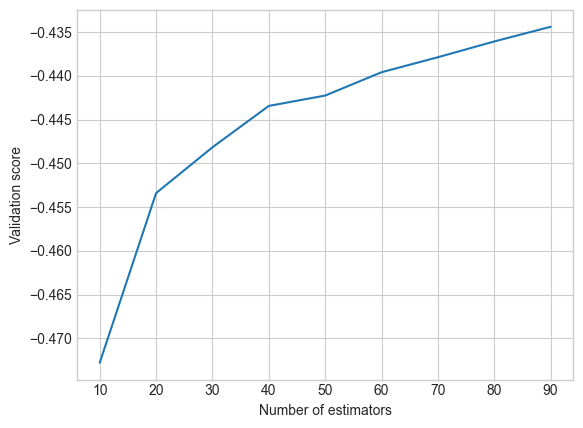

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')

# SVM
# NN ??
# print(X)

# Train the model
num_estimators = range(10, 100, 10)
val_scores = []
best_model_score = -np.inf
best_model = None

# Grid search for the best number of estimators
for i in num_estimators:

    # Train the model
    model = RandomForestRegressor(n_estimators=i, random_state=42)
    model.fit(X_train, Y_train)

    # Calculate model error on validation set
    val_scores.append(model.score(X_val, Y_val))
    print(f"RandomForestRegressor with {i} estimators has a score of {val_scores[-1]}")

    # Save the best model
    if val_scores[-1] > best_model_score:
        best_model_score = val_scores[-1]
        best_model = model

# Plot the validation scores for each number of estimators
plt.plot(num_estimators, val_scores)
plt.xlabel("Number of estimators")
plt.ylabel("Validation score")
plt.show()

# Get the predictions
# rfr_predictions = model_rfr.predict(X_test)